In [1]:
#!pip install folium
import folium
from maap.maap import MAAP
import json
maap = MAAP()

In [2]:
collection  = {
  "Collection": {
      "ShortName": "GEDI Cal/Val Field Data_1",
      "VersionId": "2"
  }
}

In [3]:
def fetch_results(query={}, timeout=180):
    """
    query the db for a bounding box and print the number of results and the first result
    """
    # use the executeQuery() function to get a response object
    response = maap.executeQuery(

      # dictionary-like object specifying the dataset to query
      src = collection,

      # dictionary-like object specifying parameters for query
      query = query,
      
      #poll_results
      poll_results = True,
      
      #timeout
      timeout = timeout
    )

    # if the 'Content-Type' is json, creates variable with json version of the response
    if (response.headers.get("Content-Type") is "application/json"):
        data = response.json()
    # if the 'Content-Type' is not json, creates variable with unicode content of the response
    else:
        data = response.text

    return json.loads(data)

# List all 68 projects

In [4]:
list_of_projects = [
    "australia_ausplotsforests",
    "australia_ilcp2015",
    "australia_robsoncreek",
    "canada_abovenwt",
    "canada_saskatchewan",
    "gabon_mondah",
    "italy_sella",
    "panama_bci",
    "usa_cafi",
    "usa_cascadeeastzone",
    "usa_cflra",
    "usa_clearcreek",
    "usa_damon",
    "usa_dcef",
    "usa_fernan",
    "usa_fitsum",
    "usa_falkowski",
    "usa_moscowmtn",
    "usa_neonabby",
    "usa_neonbart",
    "usa_neonblan",
    "usa_neonbona",
    "usa_neonclbj",
    "usa_neoncper",
    "usa_neondeju",
    "usa_neondela",
    "usa_neondsny",
    "usa_neongrsm",
    "usa_neonguan",
    "usa_neonharv",
    "usa_neonheal",
    "usa_neonjerc",
    "usa_neonjorn",
    "usa_neonkonz",
    "usa_neonlaja",
    "usa_neonleno",
    "usa_neonmlbs",
    "usa_neonmoab",
    "usa_neonniwo",
    "usa_neonnogp",
    "usa_neononaq",
    "usa_neonornl",
    "usa_neonosbs",
    "usa_neonpuum",
    "usa_neonrmnp",
    "usa_neonscbi",
    "usa_neonserc",
    "usa_neonsjer",
    "usa_neonsoap",
    "usa_neonsrer",
    "usa_neonstei",
    "usa_neontall",
    "usa_neonteak",
    "usa_neontree",
    "usa_neonukfs",
    "usa_neonunde",
    "usa_neonwood",
    "usa_neonwref",
    "usa_neonyell",
    "usa_pref",
    "usa_pref_fia",
    "usa_sierra",
    "usa_slatecreek",
    "usa_sonoma",
    "usa_stanley",
    "usa_stjoe",
    "usa_tepeecreek",
    "usa_upperlolo"
]

# Fetch plots for first project

In [12]:
project = list_of_projects[0]
results = fetch_results({
    "bbox": [-180, 90, 180, -90],
    "where": {
        "project": project
    },
    "fields": ["latitude", "longitude", "plot"],
    "table":"plot"
}, 1000)

In [29]:
# Get unique plots
project_plots = {}
keys = [ 'latitude', 'longitude' ]
for result in results:
    project_plots[result['plot']] = { key: result[key] for key in keys }

In [49]:
center = [ project_plots[first_plot]['latitude'], project_plots[first_plot]['longitude'] ]
m = folium.Map(location=center, tiles="Stamen Terrain", zoom_start = 3)
 
# Add marker one by one on the map
for plot in project_plots.items():
    folium.Marker(
        [plot[1]['latitude'], plot[1]['longitude']],
        popup = f"plot: {plot[0]}"
    ).add_to(m)

m

# Plot trees for first plot of this project

In [63]:
plot = list(project_plots.keys())[0]
results = fetch_results({
    "bbox": [-180, 90, 180, -90],
    "where": {
        "project": project,
        "plot": plot
    },
    # total height of plant from ground to highest leaf
    "fields": [ "h.t" ],
    "table": "tree"
}, 1000)

In [77]:
print(f"Number of trees: {len(results)}")
heights = [r["h.t"] for r in results if r["h.t"] is not None]
print(f"Number of trees with heights: {len(heights)}")

Number of trees: 520
Number of trees with heights: 117


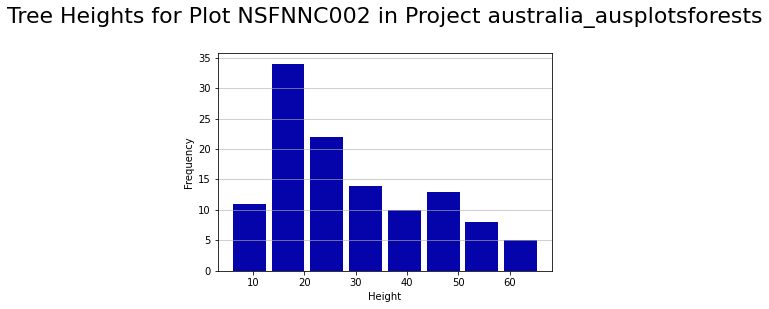

In [89]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=heights, bins='auto', color='#0504aa', rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title(f"Tree Heights for Plot {plot} in Project {project}\n", fontsize=22)
# Set a clean upper y-axis limit.
plt.show()